In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv('Домашнее задание 3 (урок 6)/HW_6_data.csv')

In [55]:
data.dates = pd.to_datetime(data.dates)

In [56]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dates          1976 non-null   datetime64[ns]
 1   SKU            1976 non-null   int64         
 2   price_per_sku  1976 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 46.4 KB


,dates,SKU,price_per_sku
0,2018-11-05,12538,137.0
1,2018-11-08,12538,137.0
2,2018-11-09,12538,137.0
3,2018-11-10,12538,137.0
4,2018-11-11,12538,137.0


In [57]:
data.describe()

,SKU,price_per_sku
count,1976.000000,1976.000000
mean,44447.900304,199.083866
std,22736.780288,69.541438
min,12538.000000,106.480000
25%,18969.000000,143.000000
50%,35200.000000,183.000000
75%,70036.000000,243.000000
max,71423.000000,363.000000


In [58]:
data.nunique()

dates            673
SKU                9
price_per_sku    170
dtype: int64

In [59]:
data.sort_values(by='dates', inplace=True)

In [60]:
data['year_week'] = data.dates.dt.year.astype(str) + '_' + data.dates.dt.week.astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [61]:
data

,dates,SKU,price_per_sku,year_week
1272,2018-01-17,70036,239.0,2018_3
1273,2018-01-18,70036,239.0,2018_3
1274,2018-01-19,70036,239.0,2018_3
1275,2018-01-20,70036,239.0,2018_3
1276,2018-01-21,70036,239.0,2018_3
...,...,...,...,...
1269,2019-12-05,61843,129.0,2019_49
681,2019-12-06,31209,168.0,2019_49
1270,2019-12-06,61843,129.0,2019_49
682,2019-12-07,31209,168.0,2019_49


In [231]:
unique_skus = data.SKU.unique()
unique_skus

array([70036, 48336, 35200, 18969, 50628, 12538, 71423, 31209, 61843],
      dtype=int64)

In [227]:
def plot_sku(sku):
    sub_data = data[data['SKU']==sku]
    p = plt.scatter(sub_data['dates'], sub_data['price_per_sku'])
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90);
    plt.xlim = ((data.dates.min(), data.dates.max()))
    return p

In [226]:
data.dates.min()

Timestamp('2018-01-17 00:00:00')

In [ ]:
fig = plt.figure(figsize=[10,5])
ax = plt.gca()
p = sns.scatterplot(data=data.sort_values(by='year_month'), x='year_month', y='price', ax=ax)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90);

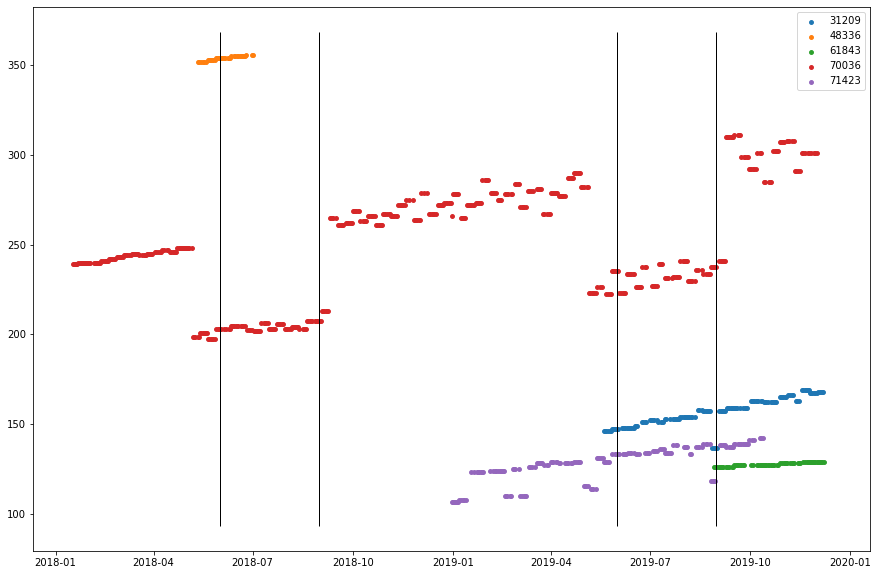

In [280]:
years = np.arange(2018, 2020)
#days = ['Jan 1', 'Jan 8', 'Feb 23', 'Mar 8', 'May 1', 'May 9', 'Jun 12', 'Nov 4'] # 70036, 71423
days = ['Jun 1', 'Aug 31'] # 70036 (blue) ?48336 (orange), ?61843 (yellow), 31209
#days = ['Nov 20', 'Dec 31'] # 50628 (purple), 18969 (red), 12538 (brown) 35200 (green)
# plt.figure(figsize=(15, 30))
# for i, sku in enumerate(unique_skus):
#     ax = plt.subplot(len(unique_skus), 1, i+1)
#     #sku=70036
#     ax.scatter(data.loc[data['SKU']==sku, 'dates'], data.loc[data['SKU']==sku,'price_per_sku'])
#     ax.set_title(f'SKU: {sku}')
#     ymin, ymax = ax.get_ylim()
#     for year in years:
#         for day in days:
#             ax.vlines(x=pd.to_datetime(f"{year} {day}"), 
#                       ymin=ymin, ymax=ymax, 
#                       linewidth=1, color='r')
plt.figure(figsize=(15, 10))   
ax = plt.subplot(1, 1, 1)
#sku = 70036
#ax.scatter(data.loc[data['SKU']==sku, 'dates'], data.loc[data['SKU']==sku,'price_per_sku'], label=sku)
for i, sku in enumerate(#unique_skus
                       set(unique_skus) - set(new_year_sku)):
    ax.scatter(data.loc[data['SKU']==sku, 'dates'], data.loc[data['SKU']==sku,'price_per_sku'], label=sku, s=15)
ymin, ymax = ax.get_ylim()
for year in years:
    for day in days:
        ax.vlines(x=pd.to_datetime(f"{year} {day}"), 
                  ymin=ymin, ymax=ymax, 
                  linewidth=1, color='black')
plt.legend()
# ax = plt.subplot(len(unique_skus), 1, 2)
# sku=48336
# ax.scatter(data.loc[data['SKU']==sku, 'dates'], data.loc[data['SKU']==sku,'price_per_sku'])
# ax.set_title(f'SKU: {sku}')

In [282]:
new_year_sku = [50628, 18969, 12538, 35200]
print(f"Remaining after New Year: {set(unique_skus) - set(new_year_sku)}")

summer_sku = [48336, 61843, 31209] #70036
print(f"Remaining after summer_sku: {set(unique_skus) - set(summer_sku)}")

holidays_sku = [70036, 71423]
print(f"Remaining after holidays_sku: {set(unique_skus) - set(holidays_sku)}")

Remaining after New Year: {31209, 48336, 61843, 70036, 71423}
Remaining after summer_sku: {35200, 50628, 70036, 18969, 12538, 71423}
Remaining after holidays_sku: {35200, 50628, 31209, 48336, 61843, 18969, 12538}


In [287]:
','.join([str(x) for x in new_year_sku])#[1:-1]

'50628,18969,12538,35200'

In [289]:
df = pd.DataFrame([','.join([str(x) for x in holidays_sku]), 
                   ','.join([str(x) for x in summer_sku]),
                   ','.join([str(x) for x in new_year_sku])])
df.to_csv('part1.txt', index=False, columns=None)
df

,0
0,"70036,71423"
1,"48336,61843,31209"
2,"50628,18969,12538,35200"


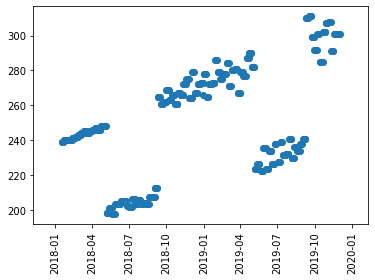

In [228]:
plot_sku(70036)

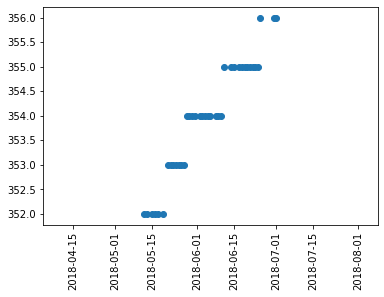

In [229]:
plot_sku(48336)

In [66]:
weekly_avg_prices = data.groupby(['SKU', 'year_week']).price_per_sku.mean().reset_index()
weekly_avg_prices

,SKU,year_week,price_per_sku
0,12538,2018_1,122.32
1,12538,2018_45,137.00
2,12538,2018_46,137.00
3,12538,2018_47,137.00
4,12538,2018_48,138.00
...,...,...,...
391,71423,2019_5,123.00
392,71423,2019_6,124.00
393,71423,2019_7,124.00
394,71423,2019_8,110.00


In [70]:
weekly_avg_prices_pt = weekly_avg_prices.pivot_table(index='year_week', columns='SKU', values='price_per_sku')
weekly_avg_prices_pt

SKU,12538,18969,31209,35200,48336,50628,61843,70036,71423
year_week,,,,,,,,,
2018_1,122.32,139.92,NaN,NaN,NaN,316.8,NaN,266.0,106.48
2018_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244.0,NaN
2018_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245.0,NaN
2018_12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244.0,NaN
2018_13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245.0,NaN
...,...,...,...,...,...,...,...,...,...
2019_5,140.00,160.00,NaN,189.0,NaN,NaN,NaN,286.0,123.00
2019_6,140.00,160.00,NaN,189.0,NaN,NaN,NaN,279.0,124.00
2019_7,140.00,164.00,NaN,188.0,NaN,NaN,NaN,275.0,124.00


# Holidays

In [186]:
years = np.arange(2018, 2020)
holidays = ['Jan 1', 'Jan 8', 'Feb 23', 'Mar 8', 'May 1', 'May 9', 'Jun 12', 'Nov 4']

def week_from_date(date_string):
    d = pd.to_datetime(date_string)
    year = d.year
    week = d.week
    return f"{year}_{week}"

In [191]:
years = np.arange(2018, 2020)
holidays = ['Jan 1', 'Jan 8', 'Feb 23', 'Mar 8', 'May 1', 'May 9', 'Jun 12', 'Nov 4']

for year in years:
    for holiday in holidays:
        year_week = week_from_date(f"{year} {holiday}")
        year_week_ind = np.where(weekly_avg_prices_pt.index == year_week)[0]#[0]
        if len(year_week_ind) > 0:
            print(year_week_ind)

[0]
2018_2
[49]
[1]
[9]
[10]
[15]
[37]
[51]
[62]
[98]
[52]
[60]
[61]
[67]
[90]


In [168]:
total_weeks = weekly_avg_prices_pt.index.shape[0]
total_weeks

100

In [200]:
np.where(weekly_avg_prices_pt.index == '2018_48')#[0][0]

(array([41], dtype=int64),)

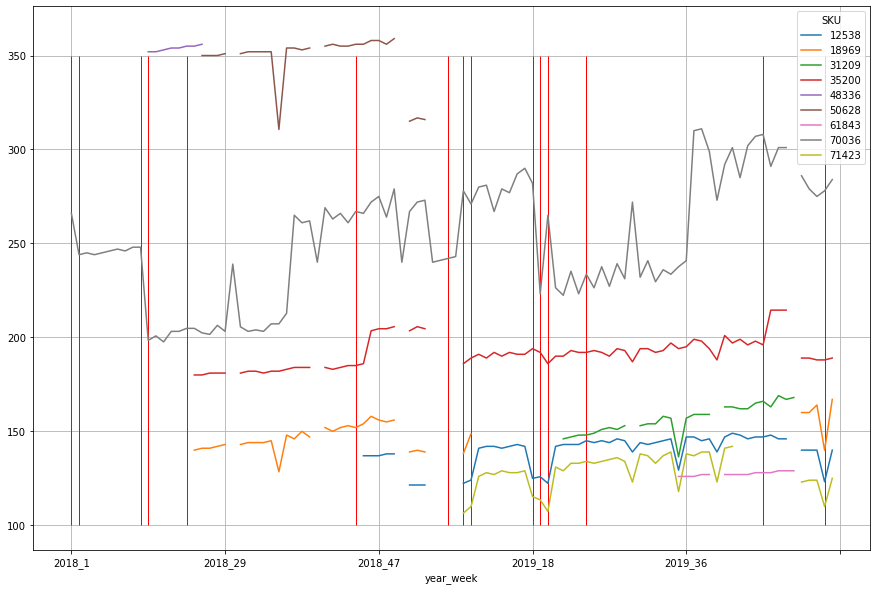

In [199]:
fig, ax = plt.subplots(figsize=(15,10))
weekly_avg_prices_pt.plot(ax=ax)
for year in years:
    for holiday in holidays:
        year_week = week_from_date(f"{year} {holiday}")
        year_week_ind = np.where(weekly_avg_prices_pt.index == year_week)[0]#[0]
        if len(year_week_ind) > 0:
            ax.vlines(x=year_week_ind, 
                      ymin=100, ymax=350, linewidth=1, color='r')
plt.grid()
#ax.axvspan(pd.to_datetime('2018-05-01'), pd.to_datetime('2019-01-01'), alpha=0.5, color='blue')

# holidays seasonality: [71423, 12538, 18969, 35200?, 31209?]

# Summer

In [201]:
years = np.arange(2018, 2020)
days = ['Jun 1', 'Aug 31']

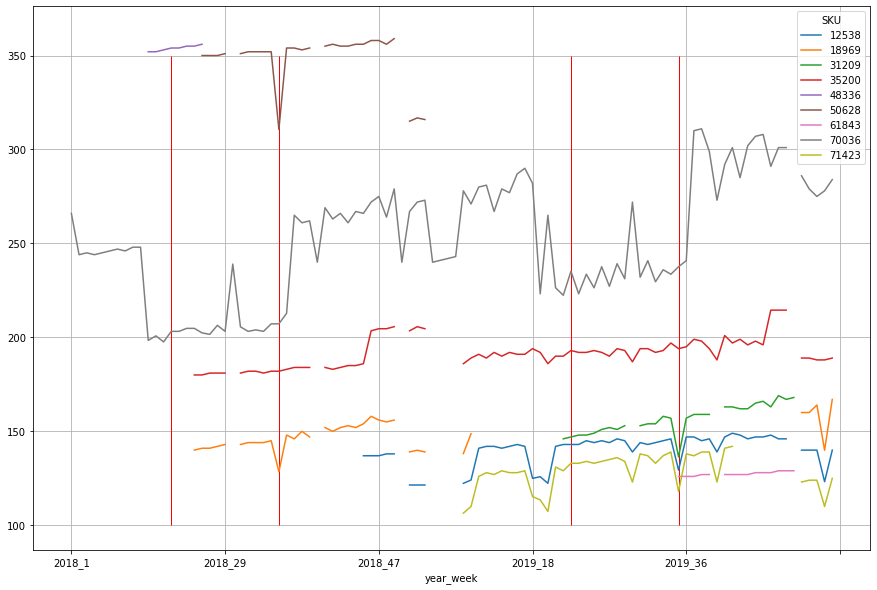

In [202]:
fig, ax = plt.subplots(figsize=(15,10))
weekly_avg_prices_pt.plot(ax=ax)
for year in years:
    for day in days:
        year_week = week_from_date(f"{year} {day}")
        year_week_ind = np.where(weekly_avg_prices_pt.index == year_week)[0]#[0]
        if len(year_week_ind) > 0:
            ax.vlines(x=year_week_ind, 
                      ymin=100, ymax=350, linewidth=1, color='r')
plt.grid()
#ax.axvspan(pd.to_datetime('2018-05-01'), pd.to_datetime('2019-01-01'), alpha=0.5, color='blue')

# Summer seasonality: [31209, 70036, 50628]

# New Year

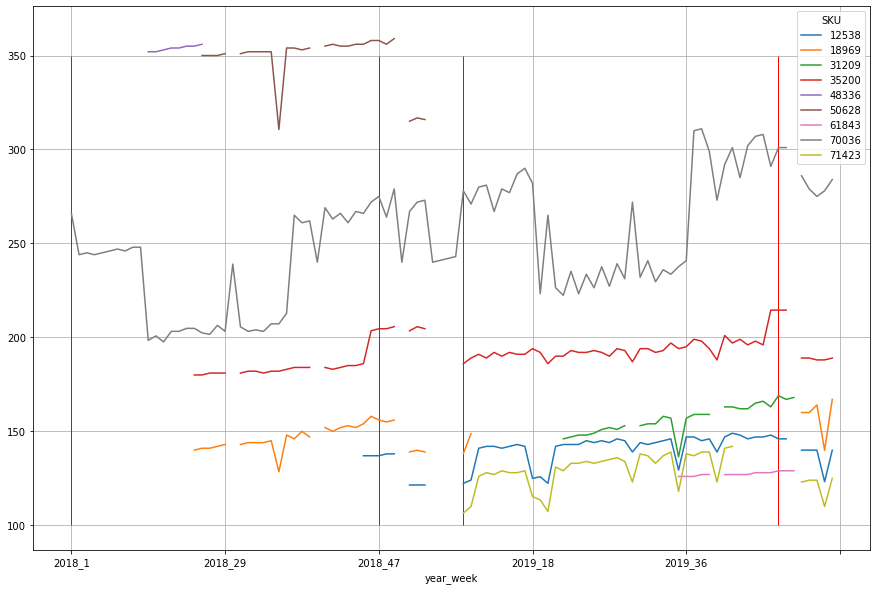

In [213]:
years = np.arange(2018, 2020)
days = ['Nov 20', 'Dec 31']

fig, ax = plt.subplots(figsize=(15,10))
weekly_avg_prices_pt.plot(ax=ax)
for year in years:
    for day in days:
        year_week = week_from_date(f"{year} {day}")
        year_week_ind = np.where(weekly_avg_prices_pt.index == year_week)[0]#[0]
        if len(year_week_ind) > 0:
            ax.vlines(x=year_week_ind, 
                      ymin=100, ymax=350, linewidth=1, color='r')
plt.grid()

# new year weeks [61843, 48336]

In [207]:
','.join(['71423', '12538', '18969', '35200'])

'71423,12538,18969,35200'

In [211]:
df = pd.DataFrame([','.join(['71423', '12538', '18969', '35200']), 
                   ','.join(['31209', '70036', '50628']),
                   ','.join(['61843', '48336'])])
df
df.to_csv('part1.txt', index=False, columns=None)

,0
0,"71423,12538,18969,35200"
1,"31209,70036,50628"
2,"61843,48336"


In [156]:
ax.get_xlim()

(-4.95, 103.95)

In [131]:
p.xaxis.majorTicks[3].label

Text(40.0, 0, '2018_47')

In [114]:
for q in p.xaxis.get_major_locator():
    print(q)

TypeError: 'FixedLocator' object is not iterable

In [11]:
data_pivot = data.pivot_table(values='price_per_sku', index='dates', columns='SKU')
data_pivot

SKU,12538,18969,31209,35200,48336,50628,61843,70036,71423
dates,,,,,,,,,
2018-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,NaN
2018-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,NaN
2018-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,NaN
2018-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,NaN
2018-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,NaN
...,...,...,...,...,...,...,...,...,...
2019-12-04,NaN,NaN,168.0,NaN,NaN,NaN,129.0,NaN,NaN
2019-12-05,NaN,NaN,168.0,NaN,NaN,NaN,129.0,NaN,NaN
2019-12-06,NaN,NaN,168.0,NaN,NaN,NaN,129.0,NaN,NaN


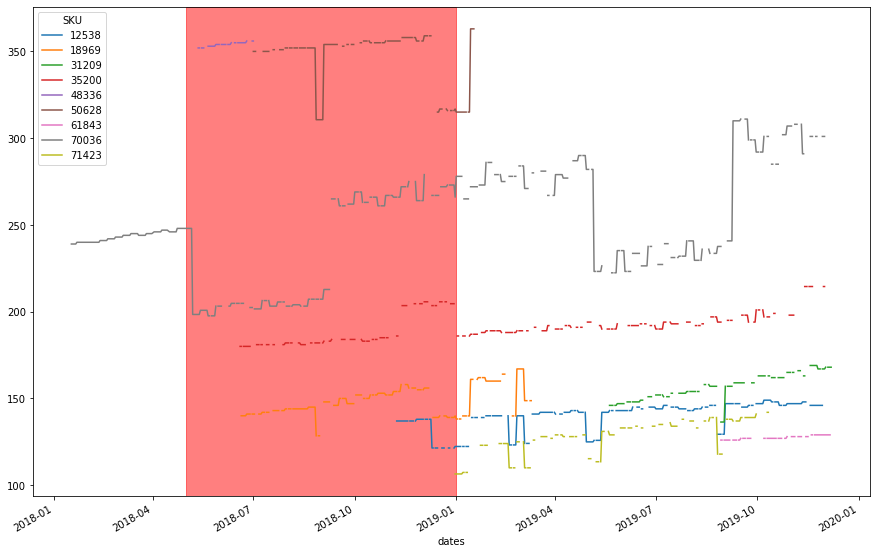

In [32]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
data_pivot.plot(ax=ax)
ax.axvspan(pd.to_datetime('2018-05-01'), pd.to_datetime('2019-01-01'), alpha=0.5, color='blue')

In [42]:
first_date = data.dates.describe()['first']
last_date = data.dates.describe()['last']
first_date, last_date

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


(Timestamp('2018-01-17 00:00:00'), Timestamp('2019-12-08 00:00:00'))

In [27]:
pd.to_datetime('2018-01-01')

Timestamp('2018-01-01 00:00:00')